<font color=black face="algerian" size="10px"> Bank Credit Appraisal EDA </font><br>
<i><font color=orange face="algerian" size="5px">-by Vivek Kumar</font></i>

<h2> About variables used in the below analysis:</h3></h2>
<ul>
<li><h3>df_curr_application :</h3>Dataframe consisting columns from dataset- application_data.csv</li>
<li><h3>df_curr_application2 :</h3>Dataframe consisting columns from dataset- application_data.csv with more than 50% missing value columns removed</li>
<li><h3>df_curr_application3 :</h3>Dataframe consisting refined columns from dataset- application_data.csv</li>
<li><h3>df_prev_application :</h3>Dataframe consisting columns from dataset- previous_application.csv</li>
<li><h3>df_prev_application2 :</h3>Dataframe consisting columns from dataset- previous_application.csv with more than 50% missing value columns removed</li>
    <li><h3>df_merged :</h3>Merged Dataframes df_curr_application and df_prev_application W.R.T. column "SK_ID_CURR" common to both Dataframe</li>
<li><h3>missing50_in_curr :</h3>Dataframe consisting columns Dataframe df_curr_application with more than 50% missing value columns</li>
<li><h3>missing50_in_prev :</h3>Dataframe consisting columns Dataframe df_prev_application with more than 50% missing value columns</li>
    <li><h3>df_asset_detes :</h3>Dataframe consisting columns containing customer's asset details</li>
<li><h3>df_contact_detes :</h3>Dataframe consisting columns containing customer's contact details</li>
</ul>

<h2>Importing all the required libraries</h2>
<ul>
<li><i>Matpotlib</i></li>
<li><i>Pandas</i></li>
<li><i>Seaborn</i></li>
<li><i>Numpy</i></li>
</ul>

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h2>
Reading both datasets
</h2>

In [2]:
df_curr_application = pd.read_csv("datasets/application_data.csv")
df_prev_application = pd.read_csv("datasets/previous_application.csv")

<h2>
Printing<tt> df_curr_application </tt>datasets
</h2>

In [3]:
df_curr_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Printing<tt> df_prev_application </tt>dataset</h2>

In [4]:
df_prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<h2>
Checking datatypes of colums in<tt> df_curr_application </tt>dataset
</h2>

In [5]:
df_curr_application.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

<h2>
Converting df(<tt> df_curr_application </tt>)dtypes to best possible dtypes:
</h2>

In [6]:
df_curr_application = df_curr_application.convert_dtypes()
df_curr_application.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    Int64  
 1    TARGET                        Int64  
 2    NAME_CONTRACT_TYPE            string 
 3    CODE_GENDER                   string 
 4    FLAG_OWN_CAR                  string 
 5    FLAG_OWN_REALTY               string 
 6    CNT_CHILDREN                  Int64  
 7    AMT_INCOME_TOTAL              Float64
 8    AMT_CREDIT                    Float64
 9    AMT_ANNUITY                   Float64
 10   AMT_GOODS_PRICE               Float64
 11   NAME_TYPE_SUITE               string 
 12   NAME_INCOME_TYPE              string 
 13   NAME_EDUCATION_TYPE           string 
 14   NAME_FAMILY_STATUS            string 
 15   NAME_HOUSING_TYPE             string 
 16   REGION_POPULATION_RELATIVE    Float64
 17   DAYS_BIRTH                    Int64  
 18   DA

<h2>
Checking datatypes of colums in<tt> df_prev_application </tt>dataset
</h2>

In [7]:
df_prev_application.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

<h2>
Converting df(<tt> df_prev_application </tt>)dtypes to best possible dtypes:
</h2>

In [8]:
df_prev_application = df_prev_application.convert_dtypes()
df_prev_application.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  Int64  
 1   SK_ID_CURR                   1670214 non-null  Int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  string 
 3   AMT_ANNUITY                  1297979 non-null  Float64
 4   AMT_APPLICATION              1670214 non-null  Float64
 5   AMT_CREDIT                   1670213 non-null  Float64
 6   AMT_DOWN_PAYMENT             774370 non-null   Float64
 7   AMT_GOODS_PRICE              1284699 non-null  Float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  string 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  Int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  string 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  Int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

<h2> Finding columns having missing values more than 50% (in <tt> df_curr_application</tt>)</h2>
<i>We can simply <b>drop</b> these values as missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.<i>

In [9]:
missing50_in_curr = pd.DataFrame(columns=['column_name','percentage'])
for col in df_curr_application.columns:
    if df_curr_application[col].isna().values.any():
        percentage = 100*df_curr_application[col].isna().sum()/df_curr_application.shape[0]
        missing50_in_curr = missing50_in_curr.append({'column_name' : col, 'percentage' : percentage}, ignore_index=True)
print("Number of columns having missing values more than 50% :",missing50_in_curr[missing50_in_curr.percentage >= 50].count()[1],"\n\n",missing50_in_curr[missing50_in_curr.percentage >= 50])

Number of columns having missing values more than 50% : 41 

                  column_name  percentage
3                OWN_CAR_AGE   65.990810
6               EXT_SOURCE_1   56.381073
9             APARTMENTS_AVG   50.749729
10          BASEMENTAREA_AVG   58.515956
12           YEARS_BUILD_AVG   66.497784
13            COMMONAREA_AVG   69.872297
14             ELEVATORS_AVG   53.295980
15             ENTRANCES_AVG   50.348768
17             FLOORSMIN_AVG   67.848630
18              LANDAREA_AVG   59.376738
19      LIVINGAPARTMENTS_AVG   68.354953
20            LIVINGAREA_AVG   50.193326
21   NONLIVINGAPARTMENTS_AVG   69.432963
22         NONLIVINGAREA_AVG   55.179164
23           APARTMENTS_MODE   50.749729
24         BASEMENTAREA_MODE   58.515956
26          YEARS_BUILD_MODE   66.497784
27           COMMONAREA_MODE   69.872297
28            ELEVATORS_MODE   53.295980
29            ENTRANCES_MODE   50.348768
31            FLOORSMIN_MODE   67.848630
32             LANDAREA_MODE   59.37

<h2> Filling missing values (in <tt> df_prev_application</tt>) column NAME_TYPE_SUITE</h2>
    <li> We will also make a copy of the original dataframe so that we can use it if required</li>
    </ul>

In [10]:
df_prev_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: Int64

In [11]:
df_prev_application['NAME_TYPE_SUITE'].fillna(df_prev_application.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [12]:
df_prev_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      1329375
Family              213263
Spouse, partner      67069
Children             31566
Other_B              17624
Other_A               9077
Group of people       2240
Name: NAME_TYPE_SUITE, dtype: Int64

<h2>Now, finding columns having missing values more than 50% (in <tt> df_prev_application</tt>)</h2>
<i>We can simply <b>drop</b> these values as missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.<i>

In [13]:
missing50_in_prev = pd.DataFrame(columns=['column_name','percentage'])
for col in df_prev_application.columns:
    if df_prev_application[col].isna().values.any():
        percentage = 100*df_prev_application[col].isna().sum()/df_prev_application.shape[0]
        missing50_in_prev = missing50_in_prev.append({'column_name' : col, 'percentage' : percentage}, ignore_index=True)
print("Number of columns having missing values more than 50% :",missing50_in_prev[missing50_in_prev.percentage >= 50].count()[1],"\n\n",missing50_in_prev[missing50_in_prev.percentage >= 50])

Number of columns having missing values more than 50% : 4 

                 column_name  percentage
2          AMT_DOWN_PAYMENT   53.636480
4         RATE_DOWN_PAYMENT   53.636480
5     RATE_INTEREST_PRIMARY   99.643698
6  RATE_INTEREST_PRIVILEGED   99.643698


<h2> Dropping coloumns having missing values more than 50%  (in <tt> df_curr_application</tt>)</h2>
<ul><li><i>It is necessary to <b>drop</b> these values as missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.<i></li>
    <li> We will also make a copy of the original dataframe so that we can use it if required</li>
    </ul>

In [14]:
df_curr_application2 = df_curr_application.drop(missing50_in_curr.column_name,axis=1)
print("Earlier df had ",df_curr_application.shape[1]," columns, but now it has ",df_curr_application2.shape[1],"columns.")
df_curr_application2

Earlier df had  122  columns, but now it has  55 columns.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


<h2> Dropping coloumns having missing values more than 50%  (in <tt> df_prev_application</tt>)</h2>
<ul><li><i>It is necessary to <b>drop</b> these values as missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.<i></li>
    <li> We will also make a copy of the original dataframe so that we can use it if required</li>
    </ul>

In [15]:
df_prev_application2 = df_prev_application.drop(missing50_in_prev.column_name,axis=1)
print("Earlier df had ",df_prev_application.shape[1]," columns, but now it has ",df_prev_application2.shape[1],"columns.")
df_prev_application2

Earlier df had  37  columns, but now it has  22 columns.


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,SATURDAY,15,Y,1,XAP,Approved,...,XAP,Unaccompanied,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,THURSDAY,11,Y,1,XNA,Approved,...,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,TUESDAY,11,Y,1,XNA,Approved,...,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,MONDAY,7,Y,1,XNA,Approved,...,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
4,1784265,202054,Cash loans,337500.0,THURSDAY,9,Y,1,Repairs,Refused,...,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,...,XAP,Unaccompanied,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,low_normal
1670210,2357031,334635,Consumer loans,87750.0,TUESDAY,15,Y,1,XAP,Approved,...,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,middle
1670211,2659632,249544,Consumer loans,105237.0,MONDAY,12,Y,1,XAP,Approved,...,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,low_normal
1670212,2785582,400317,Cash loans,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,...,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,low_normal


<li> The name of coloumns remaining after removing the missing value columns</li>

In [16]:
df_curr_application2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DO

<h2> Identifying if the data is misproportioned: </h2>
<i>We can identify that by examining the repayment trend as per <b>TARGET</b> colum<i>

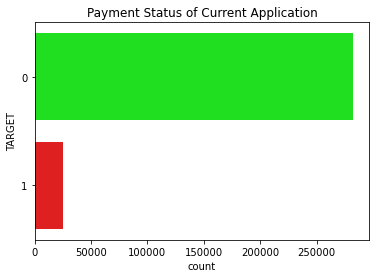

In [17]:
plt.title("Payment Status of Current Application")
sns.color_palette("tab10")
sns.countplot(y=df_curr_application['TARGET'], palette=['#00ff00',"#ff0000"])
plt.show()

<h2> Proof that the data is misproportioned: </h2>
<i>Examining the repayment trend as per <b>TARGET</b> colum:<br><b>NOTE:</b><tt>TARGET</tt> colum is 1 for defaulters & 0 otherwise<i>


In [18]:
df_curr_application.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: Float64

In [19]:
count = [0,0]
count[0] = df_curr_application[df_curr_application.TARGET == 0].shape[0]
count[1] = df_curr_application[df_curr_application.TARGET == 1].shape[0]
print("Count of Non-Defaulters in df: ", count[0])
print("Count of defaulters in df: ", count[1])
print("Count of total applications: ", count[0] + count[1])
print("Count of records in df_curr_application: ", df_curr_application.shape[0])
print("Percentage of defaulters in df: ", float("{:.2f}".format((count[1]*100)/df_curr_application.shape[0])),"%")

Count of Non-Defaulters in df:  282686
Count of defaulters in df:  24825
Count of total applications:  307511
Count of records in df_curr_application:  307511
Percentage of defaulters in df:  8.07 %


<h2>Merging columns of <tt>df_curr_application</tt> with <tt>df_prev_application</tt>:</h2>

In [20]:
df_merged = pd.merge(df_curr_application[['SK_ID_CURR', 'TARGET']], df_prev_application, how='left', on=['SK_ID_CURR'])
df_merged.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430155 non-null  Int64  
 1   TARGET                       1430155 non-null  Int64  
 2   SK_ID_PREV                   1413701 non-null  Int64  
 3   NAME_CONTRACT_TYPE           1413701 non-null  string 
 4   AMT_ANNUITY                  1106483 non-null  Float64
 5   AMT_APPLICATION              1413701 non-null  Float64
 6   AMT_CREDIT                   1413700 non-null  Float64
 7   AMT_DOWN_PAYMENT             664161 non-null   Float64
 8   AMT_GOODS_PRICE              1094176 non-null  Float64
 9   WEEKDAY_APPR_PROCESS_START   1413701 non-null  string 
 10  HOUR_APPR_PROCESS_START      1413701 non-null  Int64  
 11  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  string 
 12  NFLAG_LAST_APPL_IN_DAY       1413701 non-n

<h2> Identifying if the data from <tt>df_prev_application</tt> is misproportioned W.R.T. <tt>df_prev_application</tt>: </h2>
<i>We can identify that by examining the <b>NAME_CONTRACT_STATUS</b> as per <b>TARGET</b> colum from the merged dataset <b><tt>df_merged</tt></b> as follows:<i>

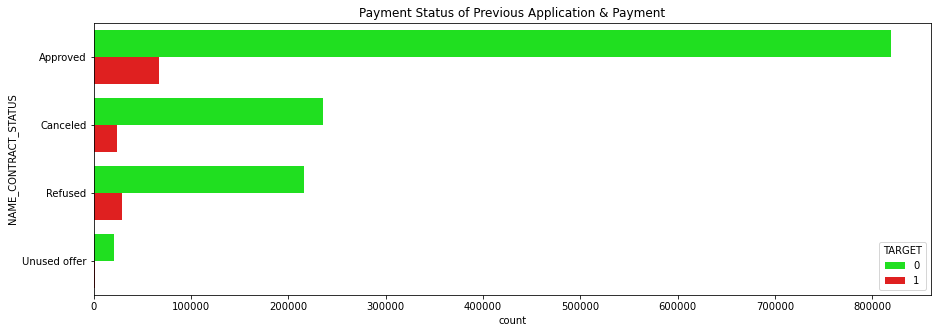

In [21]:
plt.figure(figsize=(15, 5))
plt.title("Payment Status of Previous Application & Payment")
sns.color_palette("tab10")
sns.countplot(y=df_merged['NAME_CONTRACT_STATUS'], hue=df_merged['TARGET'], palette=['#00ff00',"#ff0000"])
plt.show()

<h2>Correcting outliers in the merged dataset <tt>(df_merged)</tt></h2>
<i>We can do this by excluding the values greater than 99 percent for <b>AMT_ANNUITY</b> and <b>AMT_DOWN_PAYMENT</b> columns</i>

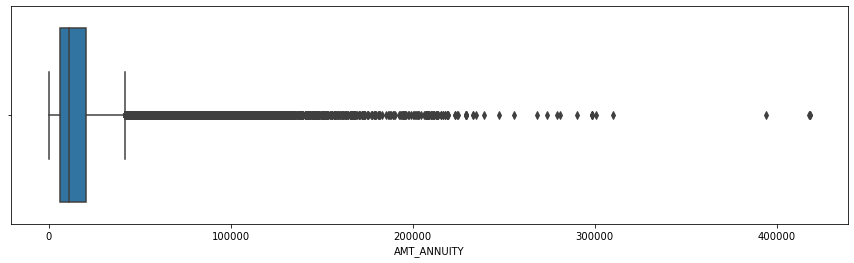

In [23]:
plt.figure(figsize=(15,4))
sns.boxplot(df_merged['AMT_ANNUITY'])
plt.show()

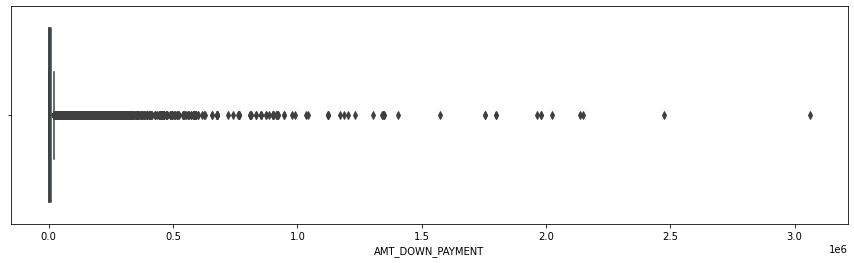

In [24]:
plt.figure(figsize=(15,4))
sns.boxplot(df_merged['AMT_DOWN_PAYMENT'])
plt.show()

<i>We are excluding the values greater than 99 percent for <b>AMT_ANNUITY</b> and <b>AMT_DOWN_PAYMENT</b> columns:</i>

In [25]:
df_merged = df_merged[df_merged['AMT_ANNUITY'] < 70000]
df_merged = df_merged[df_merged['AMT_DOWN_PAYMENT'] < 70000]

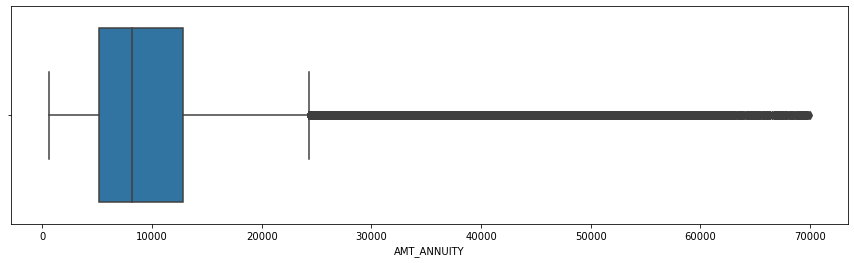

In [26]:
plt.figure(figsize=(15,4))
sns.boxplot(df_merged['AMT_ANNUITY'])
plt.show()

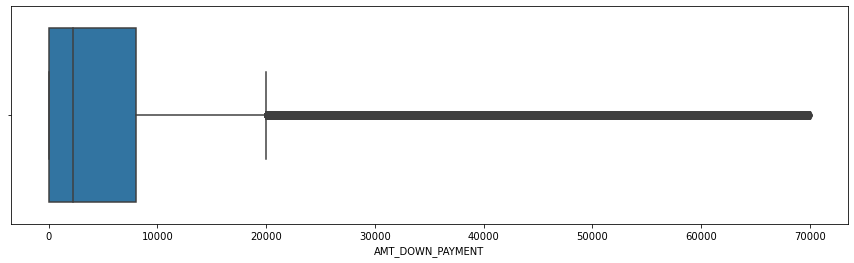

In [27]:
plt.figure(figsize=(15,4))
sns.boxplot(df_merged['AMT_DOWN_PAYMENT'])
plt.show()